<!DOCTYPE html><html itemscope="" itemtype="http://schema.org/Organization" class="no-js zsg-theme-modernized null" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:product="http://ogp.me/ns/product#" >
<head>
<title>4954 Thunderbird Pl, Saanich, BC V8Y 2A1 | MLS #869605 | Zillow</title><meta name="description" content="4954 Thunderbird Pl , Saanich, BC V8Y2A is a single-family home listed for-sale at $1,190,000. The 2,704 sq. ft. home is a 4 bed, 3.0 bath property. Find 32 photos of the 4954 Thunderbird Pl home on Zillow. View more property details, sales history and Zestimate data on Zillow. MLS # 869605"></meta><meta name="author" content="Zillow, Inc."/><meta name="Copyright" content="Copyright (c) 2006-2021 Zillow, Inc."></meta><script>(function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
        (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
       
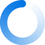

In [4]:
from bs4 import BeautifulSoup
from requests import get
import re



headers = {
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-CA,en-GB;q=0.9,en-US;q=0.8,en;q=0.7",
    "cache-control": "max-age=0",
    "dnt": "1",
    "sec-fetch-dest": "document",
    "sec-fetch-mode": "navigate",
    "sec-fetch-site": "same-origin",
    "sec-fetch-user": "?1",
    "sec-gpc": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.72 Safari/537.36"
    }


#Input the listing you want from zillow.ca 

listingURL = "https://www.zillow.com/homedetails/4954-Thunderbird-Pl-Saanich-BC-V8Y-2A1/2072542162_zpid/"
response = get(listingURL, headers=headers)
print(response.text)

In [59]:
soup = BeautifulSoup(response.text, 'html.parser')

In [60]:
soup.find('title').text

'4954 Thunderbird Pl, Saanich, BC V8Y 2A1 | MLS #869605 | Zillow'

In [109]:
price = re.findall('priceForHDP..:(\d+)', response.text)
int(price[0])

1190000

In [143]:
lat = re.findall('latitude..:(\d+.\d+)', response.text)
float(lat[0])

48.514671325683594

In [142]:
lon = re.findall('longitude..:(.\d+.\d+)', response.text)
float(lon[0])

-123.37329864501953

In [168]:
postal_code = re.findall('zipcode..:..(V\d[A-Z]\d[A-Z]\d)', response.text)
postal_code[0]

'V8Y2A1'

In [167]:
sqft = re.findall('livingArea..:(\d+)', response.text)
int(sqft[0])

2704

In [70]:
beds = re.findall('Bedrooms: <!--.*?-->(\d+)', response.text)
int(beds[0])

4

In [71]:
baths = re.findall('Bathrooms: <!--.*?-->(\d+)', response.text)
int(baths[0])

3

In [171]:
radius='25'
import requests

# Get list of offers
URL = f'https://victoria.craigslist.org/search/apa?search_distance={radius}&postal={postal_code}&min_price=600&max_price=60000&min_bedrooms={beds}&max_bedrooms={beds}&min_bathrooms={baths}&max_bathrooms={baths}&availabilityMode=0&sale_date=all+dates'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(class_='rows')
elems = results.find_all('li', class_='result-row')

import string

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text 

#Bank of the prices
prices = []

# Parse each offer tile
for elem in elems:
    try: 
        price_elem = elem.find('span', class_='result-price')
        prices.append(int(remove_punct(price_elem.text.strip())))
        url_elem = elem.find('a', class_="result-image gallery")['href']
        title_elem = elem.find('a', class_='result-title hdrlnk')
        print(price_elem.text.strip())
        print(url_elem)    
        print(title_elem.text.strip())
        print()
        
    except:
        pass

print("The average monthly rental for this listing is in the ballpark of: ", int(sum(prices) / len(prices)))

$3,700
https://victoria.craigslist.org/apa/d/victoria-bright-and-spacious-bed-bath/7285371819.html
Bright and Spacious 4 bed 3 bath home in Saanich. Quiet cul de sac very central

$4,321
https://victoria.craigslist.org/apa/d/sidney-iso-modern-dream-house/7292376014.html
ISO Modern Dream House

The average monthly rental for this listing is in the ballpark of:  4010
